EDA for Wildfire in California and Electricity usage between 2013 and 2022
Source: 
- https://www.kaggle.com/datasets/rtatman/188-million-us-wildfires
- https://www.energy.ca.gov/files/energy-consumption-data-files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
df_electricity = pd.read_csv("./Data/agg_electricity_consumption_county.csv")
df_wildfire = pd.read_csv("./Data/CA_WILDFIRE.csv", low_memory=False)

In [3]:
df_wildfire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100230 entries, 0 to 100229
Data columns (total 47 columns):
 #   Column                                                        Non-Null Count   Dtype  
---  ------                                                        --------------   -----  
 0   _id                                                           100230 non-null  int64  
 1   OBJECTID                                                      100230 non-null  int64  
 2   * Damage                                                      100230 non-null  object 
 3   * Street Number                                               95810 non-null   float64
 4   * Street Name                                                 94744 non-null   object 
 5   * Street Type (e.g. road, drive, lane, etc.)                  87033 non-null   object 
 6   Street Suffix (e.g. apt. 23, blding C)                        44148 non-null   object 
 7   * City                                                  

In [4]:
df_wildfire.rename(columns = {'* Damage':'Damage', '* Street Number':'Street Number', '* Street Name':'Street Name', '* Street Type (e.g. road, drive, lane, etc.)': 'Street Type','* City':'City', 'Street Suffix (e.g. apt. 23, blding C)': 'Street Suffix', '* CAL FIRE Unit':'CAL FIRE Unit', '* Incident Name':'Incident Name', 'Incident Start Date':'Date', '* Structure Type':'Structure Type'}, inplace=True)

In [5]:
print(df_wildfire.isnull().sum()/df_wildfire.shape[0])

_id                                                             0.000000
OBJECTID                                                        0.000000
Damage                                                          0.000000
Street Number                                                   0.044099
Street Name                                                     0.054734
Street Type                                                     0.131667
Street Suffix                                                   0.559533
City                                                            0.315415
State                                                           0.000070
Zip Code                                                        0.526798
CAL FIRE Unit                                                   0.000000
County                                                          0.000299
Community                                                       0.472294
Battalion                                          

In [6]:
df_wildfire = df_wildfire[['Damage', 'County', 'Latitude', 'Longitude','x', 'y', 'Structure Type', 'Date']]
df_wildfire.dropna(inplace=True)

In [7]:
print(df_wildfire.isnull().sum()/df_wildfire.shape[0])

Damage            0.0
County            0.0
Latitude          0.0
Longitude         0.0
x                 0.0
y                 0.0
Structure Type    0.0
Date              0.0
dtype: float64


In [8]:
df_wildfire.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100200 entries, 0 to 100229
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Damage          100200 non-null  object 
 1   County          100200 non-null  object 
 2   Latitude        100200 non-null  float64
 3   Longitude       100200 non-null  float64
 4   x               100200 non-null  float64
 5   y               100200 non-null  float64
 6   Structure Type  100200 non-null  object 
 7   Date            100200 non-null  object 
dtypes: float64(4), object(4)
memory usage: 6.9+ MB


In [9]:
df_wildfire['Damage'].unique()

array(['No Damage', 'Affected (1-9%)', 'Minor (10-25%)',
       'Destroyed (>50%)', 'Major (26-50%)', 'Inaccessible'], dtype=object)

In [10]:
# Define ordinal mapping
damage_mapping = {
    'No Damage': 0,
    'Affected (1-9%)': 1,
    'Minor (10-25%)': 2,
    'Major (26-50%)': 3,
    'Destroyed (>50%)': 4,
    'Inaccessible': 5
}

df_wildfire['Damage'] = df_wildfire['Damage'].map(damage_mapping)
df_wildfire = df_wildfire[df_wildfire['Damage'] != 5]

In [11]:
df_wildfire['Date'] = pd.to_datetime(df_wildfire['Date']).dt.year.astype(int)
df_wildfire.rename(columns = {'Date':'Year'}, inplace=True)
df_wildfire.head()

/var/folders/ny/9xbs_fn90bncs27_7zqbf6gh0000gn/T/ipykernel_41683/989940918.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_wildfire['Date'] = pd.to_datetime(df_wildfire['Date']).dt.year.astype(int)


,Damage,County,Latitude,Longitude,x,y,Structure Type,Year
0,0,Solano,38.474960,-122.044465,-1.358593e+07,4.646741e+06,Single Family Residence Multi Story,2020
1,1,Solano,38.477442,-122.043252,-1.358579e+07,4.647094e+06,Single Family Residence Single Story,2020
2,0,Solano,38.479358,-122.044585,-1.358594e+07,4.647366e+06,Single Family Residence Single Story,2020
3,0,Solano,38.487313,-122.015115,-1.358266e+07,4.648497e+06,Single Family Residence Single Story,2020
4,0,Solano,38.485636,-122.016122,-1.358277e+07,4.648259e+06,Single Family Residence Single Story,2020


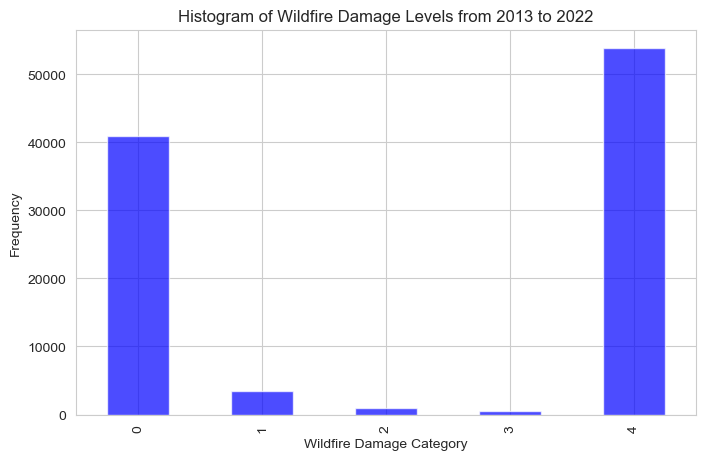

In [12]:
plt.figure(figsize=(8, 5))
df_wildfire['Damage'].value_counts().sort_index().plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel("Wildfire Damage Category")
plt.ylabel("Frequency")
plt.title("Histogram of Wildfire Damage Levels from 2013 to 2022")
plt.show()



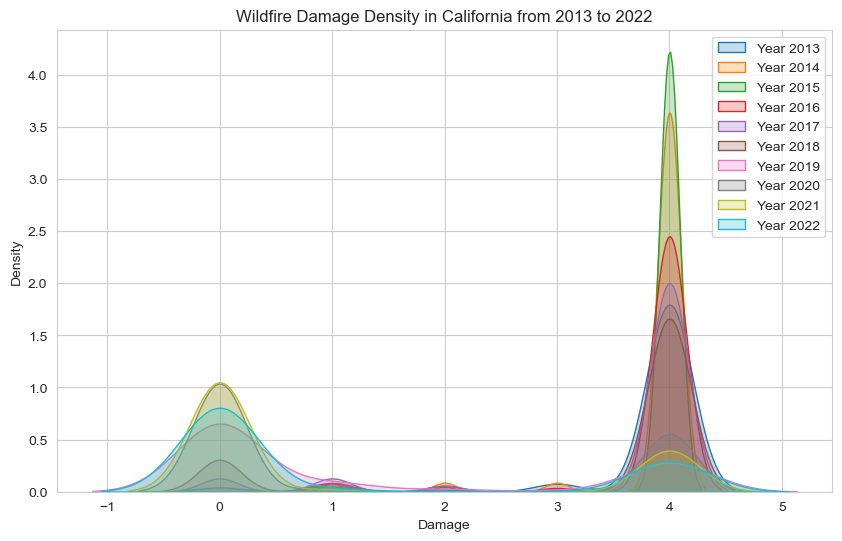

In [13]:
plt.figure(figsize=(10, 6))

# Plot KDE for each year that interesect with the electricy data accessible
for year in [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]:
    sns.kdeplot(df_wildfire[df_wildfire['Year'] == year]['Damage'], 
                fill=True, label=f"Year {year}")

plt.xlabel("Damage")
plt.ylabel("Density")
plt.title("Wildfire Damage Density in California from 2013 to 2022")
plt.legend()
plt.show()

# add the 3D one

In [16]:
print(df_electricity.head())

   Year  CountyNum CountyName                         Sector RNR          GWh
0  1990          1    ALAMEDA  Agriculture and Water Pumping  NR   903.919433
1  1990          1    ALAMEDA                     Commercial  NR  3477.775257
2  1990          1    ALAMEDA                     Industrial  NR  1895.868822
3  1990          1    ALAMEDA                         Mining  NR   107.551622
4  1990          1    ALAMEDA                    Residential   R  2498.265626


In [23]:
print(df_electricity.describe())

               Year           GWh
count  13355.000000  13355.000000
mean    2005.996031    652.828102
std        9.522283   2067.825578
min     1990.000000     -7.846650
25%     1998.000000     10.075856
50%     2006.000000     76.311460
75%     2014.000000    427.188290
max     2022.000000  28563.323620


In [24]:
print(df_electricity.isnull().sum())

Year      0
County    0
GWh       0
dtype: int64


In [25]:
df_electricity = df_electricity.drop(['Sector', 'RNR', 'CountyNum'], axis=1)

KeyError: "['Sector', 'RNR', 'CountyNum'] not found in axis"

In [ ]:
df_electricity.rename(columns = {'CountyName':'County'}, inplace=True)
df_electricity['County'] = df_electricity['County'].astype(str).str.capitalize()

In [ ]:
df_electricity.describe()

,Year,GWh
count,13355.000000,13355.000000
mean,2005.996031,652.828102
std,9.522283,2067.825578
min,1990.000000,-7.846650
25%,1998.000000,10.075856
50%,2006.000000,76.311460
75%,2014.000000,427.188290
max,2022.000000,28563.323620


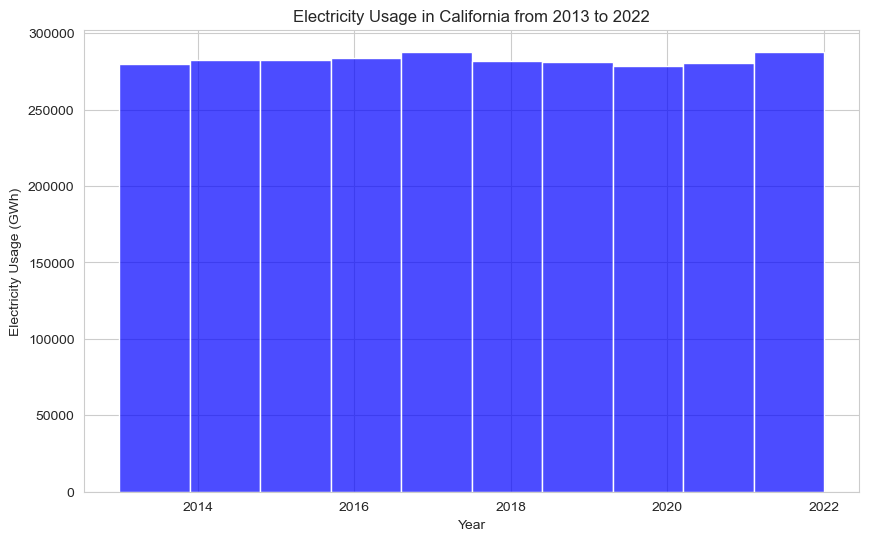

In [26]:
years = (df_electricity['Year'] >= 2013) & (df_electricity['Year']<= 2022)
plt.figure(figsize=(10, 6))
sns.histplot(data=df_electricity[years], x="Year", weights="GWh", bins=10, color="blue", alpha=0.7)
plt.xlabel("Year")
plt.ylabel("Electricity Usage (GWh)")
plt.title("Electricity Usage in California from 2013 to 2022")
plt.show()


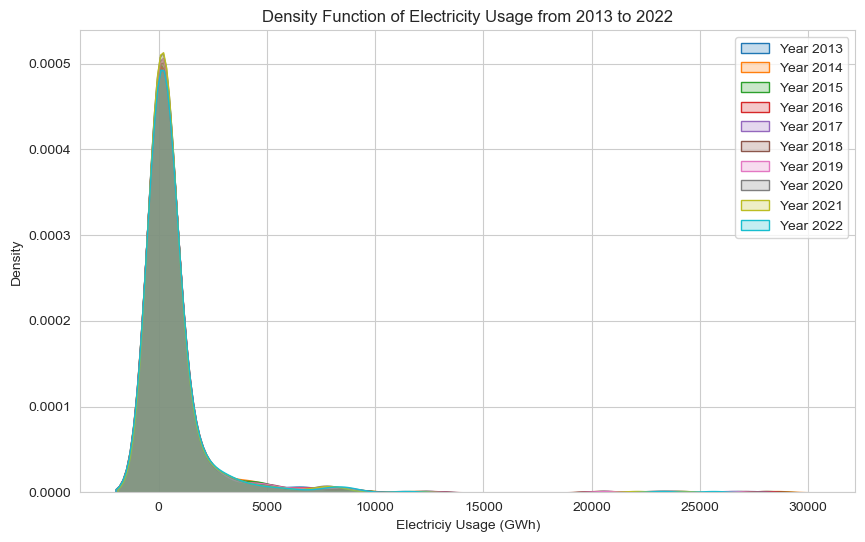

In [27]:
plt.figure(figsize=(10, 6))
for year in [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]:
    sns.kdeplot(df_electricity[df_electricity['Year'] == year]['GWh'], 
                fill=True, label=f"Year {year}")

plt.xlabel("Electriciy Usage (GWh)")
plt.ylabel("Density")
plt.title("Density Function of Electricity Usage from 2013 to 2022")
plt.legend()
plt.show()

In [28]:
damage_by_year = df_wildfire[(df_wildfire['Year'] >= 2013) & (df_wildfire['Year']<= 2022)].groupby('Year')['Damage'].mean()
electricity_by_year = df_electricity[(df_electricity['Year'] >= 2013) & (df_electricity['Year']<= 2022)].groupby('Year')['GWh'].mean()
correlation = damage_by_year.corr(electricity_by_year)
print(f"Correlation between Wildfire Damage and Electricity Usage in California: {correlation:.2f}")


Correlation between Wildfire Damage and Electricity Usage in California: 0.06


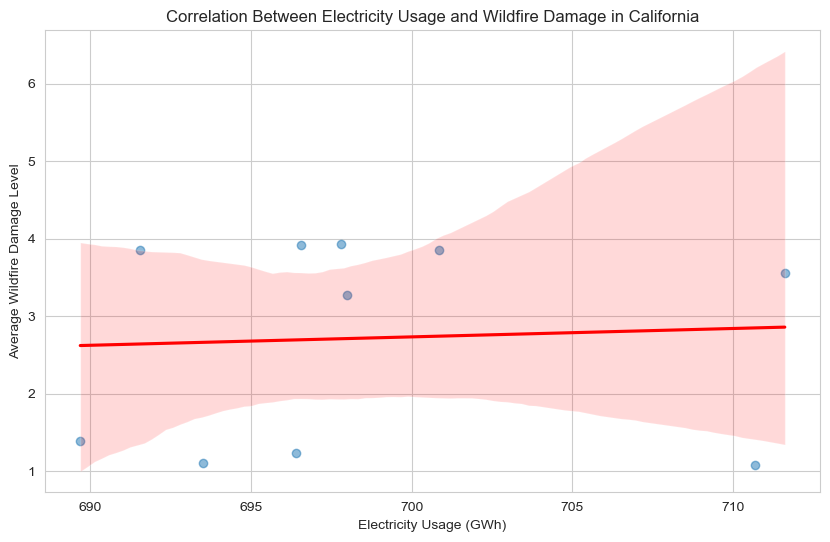

In [29]:

plt.figure(figsize=(10, 6))
sns.regplot(x=electricity_by_year, y=damage_by_year,
            scatter_kws={'alpha': 0.5}, line_kws={"color": "red"})

plt.xlabel("Electricity Usage (GWh)")
plt.ylabel("Average Wildfire Damage Level")
plt.title("Correlation Between Electricity Usage and Wildfire Damage in California")
plt.show()


ß